In [7]:
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop
from keras import backend as K

## Load Data

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

## Preprocess Data

In [5]:
if K.image_data_format() == 'channels_first':
    X_train = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    X_test = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X_train = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    X_test = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /=255

In [8]:
y_train = keras.utils.to_categorical(mnist_train_labels, 10)
y_test = keras.utils.to_categorical(mnist_test_labels, 10)

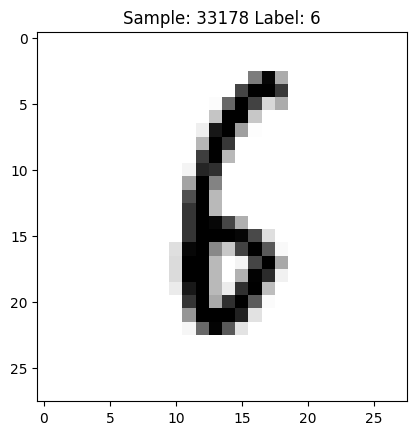

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def display_sample(num):
    label = np.argmax(y_train[num])
    image = X_train[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()

num = np.random.randint(0, X_train.shape[0])
display_sample(num)

## Model

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

2023-10-31 11:33:32.438397: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=2,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 - 128s - loss: 0.1180 - accuracy: 0.9647 - val_loss: 0.0435 - val_accuracy: 0.9867 - 128s/epoch - 68ms/step
Epoch 2/2
1875/1875 - 108s - loss: 0.0716 - accuracy: 0.9785 - val_loss: 0.0371 - val_accuracy: 0.9876 - 108s/epoch - 57ms/step


In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy:', score[1])

Test loss:  0.03709034249186516
Test accuracy: 0.9876000285148621
